In [1]:
import pandas as pd
import numpy as np

In [2]:
import cv2

In [3]:
from imutils import paths

In [4]:
import os

In [5]:
covid_path='/content/drive/My Drive/CovidDataset/COVID'

In [6]:
nor_path='/content/drive/My Drive/CovidDataset/NORMAL'

In [7]:
covid_img_path=list(paths.list_images(covid_path))

In [8]:
nor_img_path=list(paths.list_images(nor_path))

In [9]:
print(len(covid_img_path))

500


In [10]:
labels=[]

In [11]:
data=[]

In [12]:
for image_path in covid_img_path:
  label=image_path.split(os.path.sep)[-2]
  labels.append(label)
  # print(image_path)
  image=cv2.imread(image_path)
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(224,224))
  data.append(image)


In [13]:
for i in range(len(covid_img_path)):
  label=nor_img_path[i].split('/')[-2]
  labels.append(label)
  # print(image_path)
  image=cv2.imread(nor_img_path[i])
  image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(224,224))
  data.append(image)


In [14]:
len(labels)

1000

In [15]:
data = np.array(data) / 255.0

In [16]:
data.shape

(1000, 224, 224, 3)

In [17]:
labels=np.array(labels)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lb=LabelEncoder()

In [20]:
labels=lb.fit_transform(labels)

In [21]:
df=pd.DataFrame(labels)

In [22]:
df=df.rename(columns={0:'labels'})

In [23]:
labels.shape

(1000,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=99)

In [26]:
from keras.applications import VGG16

Using TensorFlow backend.


In [27]:
from keras.models import Model

In [28]:
from keras.layers import Dense,Dropout

In [29]:
from keras.activations import relu

In [30]:
from keras.optimizers import Adam

In [31]:
X_train.shape

(750, 224, 224, 3)

In [32]:
model=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='max')

58892288/58889256 [==============================] - 6s 0us/step


In [33]:
for i in model.layers:
  i.trainable=False

In [34]:
dense1=Dense(50,activation='relu')(model.output)

In [35]:
dense2=Dense(30,activation='relu')(dense1)

In [36]:
dropout1=Dropout(0.3)(dense2)

In [37]:
dense3=Dense(25,activation='relu')(dropout1)

In [38]:
dense4=Dense(1,activation='sigmoid')(dense3)

In [39]:
tot_model=Model(inputs=model.input,outputs=dense4)

In [40]:
tot_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [41]:
adam=Adam()

In [42]:
tot_model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train_aug=ImageDataGenerator(rotation_range=20,
# 		zoom_range=0.15,
# 		width_shift_range=0.2,
# 		height_shift_range=0.2,
# 		shear_range=0.15,
# 		horizontal_flip=True,
# 		fill_mode="nearest")

In [ ]:
BS = 8
EPOCHS = 50

In [ ]:
# history = tot_model.fit(
# 	x=train_aug.flow(X_train, y_train, batch_size=BS),
# 	validation_data=(X_test, y_test),
# 	steps_per_epoch=len(X_train) // BS,
# 	epochs=EPOCHS)

Epoch 1/50
71/71 [==============================] - 14s 200ms/step - loss: 0.4603 - accuracy: 0.7851 - val_loss: 0.1672 - val_accuracy: 0.9371
Epoch 2/50
71/71 [==============================] - 7s 105ms/step - loss: 0.1764 - accuracy: 0.9378 - val_loss: 0.0818 - val_accuracy: 0.9720
Epoch 3/50
71/71 [==============================] - 7s 105ms/step - loss: 0.1375 - accuracy: 0.9556 - val_loss: 0.0734 - val_accuracy: 0.9720
Epoch 4/50
71/71 [==============================] - 8s 106ms/step - loss: 0.1041 - accuracy: 0.9701 - val_loss: 0.0599 - val_accuracy: 0.9790
Epoch 5/50
71/71 [==============================] - 7s 103ms/step - loss: 0.0871 - accuracy: 0.9677 - val_loss: 0.0426 - val_accuracy: 0.9790
Epoch 6/50
71/71 [==============================] - 7s 104ms/step - loss: 0.1149 - accuracy: 0.9591 - val_loss: 0.0620 - val_accuracy: 0.9790
Epoch 7/50
71/71 [==============================] - 7s 102ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0910 - val_accuracy: 0.9580
Epoch

In [ ]:
# history=tot_model.fit_generator(train_aug.flow(X_train,y_train),epochs=25,validation_data=(X_test,y_test),)

In [43]:
history=tot_model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test))

Train on 750 samples, validate on 250 samples
Epoch 1/25
750/750 [==============================] - 16s 22ms/step - loss: 0.6634 - accuracy: 0.5360 - val_loss: 0.5105 - val_accuracy: 0.8400
Epoch 2/25
750/750 [==============================] - 6s 8ms/step - loss: 0.4657 - accuracy: 0.8107 - val_loss: 0.3030 - val_accuracy: 0.9640
Epoch 3/25
750/750 [==============================] - 6s 8ms/step - loss: 0.2849 - accuracy: 0.9240 - val_loss: 0.1285 - val_accuracy: 0.9840
Epoch 4/25
750/750 [==============================] - 6s 8ms/step - loss: 0.1632 - accuracy: 0.9507 - val_loss: 0.0921 - val_accuracy: 0.9640
Epoch 5/25
750/750 [==============================] - 6s 8ms/step - loss: 0.1082 - accuracy: 0.9720 - val_loss: 0.0442 - val_accuracy: 0.9840
Epoch 6/25
750/750 [==============================] - 6s 8ms/step - loss: 0.0800 - accuracy: 0.9813 - val_loss: 0.0313 - val_accuracy: 0.9920
Epoch 7/25
750/750 [==============================] - 6s 8ms/step - loss: 0.0612 - accuracy: 0.9867 

In [44]:
ta=history.history['accuracy']

In [45]:
va=history.history['val_accuracy']

In [46]:
tl=history.history['loss']

In [47]:
vl=history.history['val_loss']

In [48]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

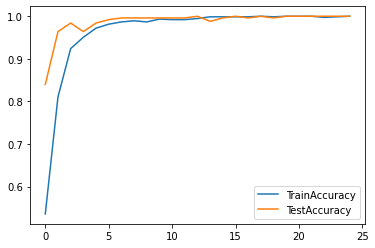

In [50]:
plt.plot(ta,label='TrainAccuracy')
plt.plot(va,label='TestAccuracy')
plt.legend()

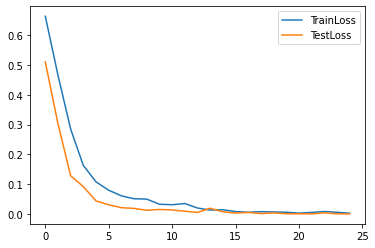

In [51]:
plt.plot(tl,label='TrainLoss')
plt.plot(vl,label='TestLoss')
plt.legend()

In [52]:
train_pred=tot_model.predict(X_train)

In [53]:
for i in range(len(train_pred)):
  if train_pred[i]>0.5:
    train_pred[i]=1
  else:
    train_pred[i]=0  

In [54]:
train_pred

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       371

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [57]:
confusion_matrix(y_train,train_pred)

array([[379,   0],
       [  0, 371]])

In [58]:
test_pred=tot_model.predict(X_test)

In [59]:
for i in range (len(test_pred)):
  if test_pred[i]>0.5:
    test_pred[i]=1
  else:
    test_pred[i]=0

In [60]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       129

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [61]:
confusion_matrix(y_test,test_pred)

array([[121,   0],
       [  0, 129]])